In [1]:
#!//usr/bin/python3.6


# functii pentru incarcarea si ordonarea datelor.




import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing

separator = '=' * 30

# intoarce doi vectori, unul cu fiecare numar de sample in ordinea din fisierul "train_labels.csv"
# iar celalalt contine user-ul corespunzator
def loadTrainLabels(path):
    pairs = np.loadtxt(path, delimiter=',', skiprows=1, dtype=int)
    return pairs[:, 0], pairs[:, 1]

# intoarce un array bidimensional, unde pe linia u se afla toate numerele de sample care apartin user-ului u.
def sortData():
    idsOfUser = np.zeros((21, 450), dtype=int)
    for u in range(1, 21):
        idsOfUser[u, :] = allTrainId[ allTrainLabel == u ]

    return idsOfUser

# incarca toate sample-urile utilizatorului specificat ca parametru
# si intoarce o lista de python care contine toate ndarray-urile utilizatorului.
# variabila count este pentru a afisa pe ecran progresul de incarcare.
count = 0
def loadData(path, ids, user):
    global count
    npArraysOfUser = []
    
    for id in ids:
        count += 1
        arr = np.loadtxt(path + str(id) + ".csv", delimiter=',', skiprows=0, dtype=np.float64)
        npArraysOfUser.append(arr)

        if (count % 1000 == 0):
            print("loaded", count, "data")
            print(separator, "\n")
    
    print("loaded data for user", user)
    return npArraysOfUser

# primeste ca parametru un sample ( ndarray de dimensiuni (aproximativ 150, 3) )
# si foloseste interpolarea liniara pe fiecare coloana / coordonata pentru 
# a aduce acest array la dimensiunea (150, 3)
def interpolateData(sample):
    newSample = np.zeros((150, 3))

    x = np.arange(1, 150 + 1, 1)
    xp = np.linspace(1, 150, sample.shape[0])
    for k in range(0, 3):
        yp = sample[:, k]
        newSample[:, k] = np.interp(x, xp, yp)

    return newSample


In [2]:
# apelarea functiilor precedente.


allTrainId, allTrainLabel = loadTrainLabels("../data/train_labels.csv")
idsOfUser = sortData()

# dataOfUser este o lista de liste de ndarray-uri cu urmatoarea semnificatie:
# dataOfUser[u][s] = al s-ulea sample al user-ului u, reprezentat ca un ndarray de dimensiune (~150, 3)
dataOfUser = [0] * 21
for u in range(1, 20 + 1):
    dataOfUser[u] = loadData(path="../data/train/", ids=idsOfUser[u, :], user=u)
print("done with loading")
print(separator)

    

for u in range(1, 20 + 1):
    for s in range(0, 450):
        dataOfUser[u][s] = interpolateData(dataOfUser[u][s])
        
        if dataOfUser[u][s].size != 450:
            raise Exception('spam', 'eggs')
            
print("done with interpolating")
print("done")
print(separator)



loaded data for user 1
loaded data for user 2
loaded 1000 data

loaded data for user 3
loaded data for user 4
loaded 2000 data

loaded data for user 5
loaded data for user 6
loaded 3000 data

loaded data for user 7
loaded data for user 8
loaded 4000 data

loaded data for user 9
loaded data for user 10
loaded data for user 11
loaded 5000 data

loaded data for user 12
loaded data for user 13
loaded 6000 data

loaded data for user 14
loaded data for user 15
loaded 7000 data

loaded data for user 16
loaded data for user 17
loaded 8000 data

loaded data for user 18
loaded data for user 19
loaded 9000 data

loaded data for user 20
done with loading
done with interpolating
done


In [3]:
# cod pentru extragerea de feature-uri din fiecare sample.



# functii de extragere de feature-uri care functioneaza pe orice fereastra / sample:

# intoarce un ndarray cu 3 valori reprezentand minimul pe fiecare coordonata.
def getMin(sample):
    ans = []
    
    for k in range(3):
        ans.append(sample[:, k].min())
    
    return np.array(ans)


# intoarce un ndarray cu 3 valori reprezentand maximul pe fiecare coordonata.
def getMax(sample):
    ans = []
    
    for k in range(3):
        ans.append(sample[:, k].max())
    
    return np.array(ans)

# intoarce un ndarray cu 3 valori reprezentand media algebrica pe fiecare coordonata.
def getAverages(sample):
    ans = []
    
    for k in range(3):
        ans.append(sample[:, k].mean())
    
    return np.array(ans)

# intoarce un ndarray cu 3 valori reprezentand media patratica pe fiecare coordonata.
def getRootMeanSquare(sample):
    ans = np.sqrt( (sample * sample).sum(axis = 0) / sample.shape[0] )
    return np.array(ans)

# intoarce un ndarray cu o valoare reprezentand media algebrica pe a treia coordonata.
def getAverageZ(sample):
    return sample[:, 2].mean()
    

# intoarce un ndarray bidimensional, unde o coloana reprezinta diferente 
# intre doua valori consecutive ale acelei coordonate.
def getDifferences(sample):    
    diffs = sample[1:, :] - sample[:-1, :]
    return diffs

# intoarce un ndarray cu 3 valori reprezentand media algebrica a diferentelor de pe fiecare coordonata.
def getDiffAverage(sample):
    diffs = getDifferences(sample)
    
    # am gresit aici cu:
    return diffs.min(axis=0)
    # corect:
#     return diffs.mean(axis=0)
    

# intoarce un ndarray cu 3 valori reprezentand minimul diferentelor pe fiecare coordonata.
def getDiffMin(sample):
    diffs = getDifferences(sample)
    return diffs.min(axis=0)

# intoarce un ndarray cu 3 valori reprezentand maximul diferentelor pe fiecare coordonata.
def getDiffMax(sample):
    diffs = getDifferences(sample)
    return diffs.max(axis=0)

# intoarce un ndarray cu 3 valori reprezentand media patratica a diferentelor de pe fiecare coordonata.
def getDiffRootMeanSquare(sample):
    diffs = getDifferences(sample)
    
    # am gresit aici cu:
    ans = np.sqrt( (diffs * diffs).sum() / diffs.shape[0] )
    # corect: 
#     ans = np.sqrt( (diffs * diffs).sum(axis=0) / diffs.shape[0] )
    return np.array(ans)

# intoarce un ndarray cu 3 valori reprezentand varianta diferentelor de pe fiecare coordonata.
def getDiffVariance(sample):
    diffs = getDifferences(sample)
    return diffs.var()



# intoarce un vector coloana, fiecare linie din el reprezentand norma l2 
# a vectorului de pe linia respective din sample.
def getNormVectorEuclid(sample):
    result = np.zeros(sample.shape[0])
    
    for k in range(3):
        result += sample[:, k] * sample[:, k]
        
    return np.sqrt( result )

# intoarce un vector coloana, fiecare linie din el reprezentand norma l1 
# a vectorului de pe linia respective din sample.
def getNormVectorManhattan(sample):
    result = np.zeros(sample.shape[0])
    
    for k in range(3):
        result += np.abs(sample[:, k])
        
    return result    

# intoarce un vector coloana, fiecare linie din el reprezentand norma aleasa calculata pe
# vectorul de pe linia respective din sample.
def getNormVector(sample):
    result = getNormVectorEuclid(sample)
#     result = getNormVectorManhattan(sample)
    
    return result

# intoarce o valoare reprezentand media algebrica a normelor de pe fiecare linie din sample;
def getNormAverage(sample):
    norm = getNormVector(sample)
    return norm.mean()

# intoarce o valoare reprezentand minimul normelor de pe fiecare linie din sample;
def getNormMin(sample):
    norm = getNormVector(sample)
    return norm.min()

# intoarce o valoare reprezentand maximul normelor de pe fiecare linie din sample;
def getNormMax(sample):
    norm = getNormVector(sample)
    return norm.max()

# intoarce o valoare reprezentand varianta normelor de pe fiecare linie din sample;
def getNormVariance(sample):
    norm = getNormVector(sample)
    return norm.var()

# intoarce o valoare reprezentand media patratica a normelor de pe fiecare linie din sample;
def getNormRootMeanSquare(sample):
    norm = getNormVector(sample)
    
    ans = np.sqrt( (norm * norm).sum() / norm.shape[0] )
    return np.array(ans)



# intoarce un vector cu 3 valori, 
# fiecare valoare reprezentand numarul de "varfuri" / "intoarceri"
# pe care le face graficul fiecarei coordonate din sample.
def getNumPeaks(sample):
    ans = []
    
    for k in range(3):
        coords = sample[:, k]
        
        curr = 0
        for i in range(1, coords.size - 1):
            if coords[i-1] < coords[i] and coords[i] > coords[i + 1]:
                curr += 1
            elif coords[i-1] > coords[i] and coords[i] < coords[i + 1]:
                curr += 1
        
        ans.append(curr)
        
    return np.array(ans)

# intoarce 3 valori, fiecare reprezentand corelatia dintre doua variabile aleatore.
# o astfel de variabila e data de valorile de pe o coloana a sample-ului.
def getCorrelation(sample):
    coefs = np.corrcoef(sample, rowvar=False)
    return np.concatenate(( np.array(coefs[0, 1:3]), np.array(coefs[1, 2]) ), axis=None)



# intoarce o lista cu pointer-i catre functiile ce se vor aplica
# pe fiecare window pentru a extrage feature-uri
def getWindowExtractFunctions():
    ans = []
    
    ans.append(getMin)
    ans.append(getMax)
    ans.append(getNumPeaks)
    ans.append(getAverages)
#     ans.append(averageZ)
    ans.append(getRootMeanSquare)

    ans.append(getDiffAverage)
#     ans.append(getDiffMin)
#     ans.append(getDiffMax)
#     ans.append(getDiffRootMeanSquare)
    ans.append(getDiffVariance)

    ans.append(getNormAverage)
    ans.append(getNormMin)
    ans.append(getNormMax)
    ans.append(getNormRootMeanSquare)
    ans.append(getNormVariance)
    
    ans.append(getCorrelation)
#     ans.append(getNormVariance)
    
    return ans
windowExtract = getWindowExtractFunctions()
numWindows = 5

# generator care sparge un sample in numWindow ferestre si intoarce cate un subSample corespunzator.
def getWindowsDistinct(sample, indexes = np.split( np.arange(0, 150), numWindows),  ):
    for windowIndexes in indexes:
        subSample = sample[windowIndexes, :]
        yield subSample

# generator care sparge un sample in ferestre si intoarce cate un subSample corespunzator.
# ferestre consecutive se suprapun pe jumatate (jumatatea a doua a primeia este aceeasi
# cu prima jumatate a celei de a doua ferestre).
# 2*halfSize reprezinta dimensiunea unei ferestre, deci numarul de ferestre rezultat va fi
# (dimSample / halfSize) - 1.
def getWindowsOverlap(sample, halfSize = 30):
    left = 0
    while True:
        right = left + 2*halfSize
        if right < 150:
            yield sample[left : right]
        else:
            right = 150
            yield sample[left : right]
            break
        
        left += halfSize

# generator care intoarce toate subSample-urile / ferestrele pentru un sample, 
# in functie de metoda de spargere aleasa.
def getWindows(sample):
    generator = getWindowsDistinct
#     generator = getWindowsOverlap
    
    for window in generator(sample):
        yield window
    
    


        
        
        
# functii de extragere de feature-uri care functioneaza doar pe un sample intreg:

# intoarce un ndarray cu 3 numere pentru fiecare coloana.
# un numar reprezinta varianta numarului de "varfuri" din ferestrele de pe acea coloana.
def getPeaksVariance(sample):
    nums = []
    for subSample in getWindows(sample):
        nums.append(getNumPeaks(subSample))
    nums = np.array(nums)

    ans = []
    for k in range(3):
        ans.append( nums[:, k].var() )
    
    return np.array(ans)    
    

# intoarce o lista cu pointer-i catre functiile ce se vor aplica
# pe un intreg sample pentru a extrage feature-uri
def getWholeExtractFunctions():
    ans = []
    
    ans.append(getPeaksVariance)
    ans.append(getNormVariance)
#     ans.append(getDifferences)
#     ans.append(getAverageZ)
    
    ans.append(getMin)
    ans.append(getMax)
    ans.append(getNumPeaks)
    ans.append(getAverages)
    ans.append(getRootMeanSquare)
    
    ans.append(getDiffAverage)
#     ans.append(getDiffMin)
#     ans.append(getDiffMax)
#     ans.append(getDiffRootMeanSquare)
    ans.append(getDiffVariance)
    
    ans.append(getNormAverage)
    ans.append(getNormMin)
    ans.append(getNormMax)
    ans.append(getNormRootMeanSquare)
    ans.append(getNormVariance)
    
    ans.append(getCorrelation)
    
    return ans
wholeExtract = getWholeExtractFunctions()




# functie care ia un sample de forma (150, 3) si il transforma 
# intr-un vector linie, unde fiecare valoare
# reprezinta un feature extras din sample.
def extractFeatures(sample):
    acumulator = []
    
    for subSample in getWindows(sample):
        for f in windowExtract:
            acumulator.append(f(subSample))
    
    for f in wholeExtract:
        acumulator.append(f(sample))
    
    result = np.concatenate(tuple(acumulator), axis=None)
    return result

# in sampleFeatureList se vor pune fiecare vector linie cu features extras din fiecare sample
sampleFeatureList = []
for u in range(1, 20 + 1):
    for s in range(450):
        sample = dataOfUser[u][s]
        
        features = extractFeatures(sample)
        sampleFeatureList.append(features)


# iar acestea se vor pune una peste alta pentru a se obtine formatul cerut de clasificatorul svm.svc
# structuredFeatures e un ndarray bidimensional, unde
# primele 450 de linii sunt vectori de features ale utilizatorului 1,
# urmatoarele 450 de linii sunt vectori de features ale utilizatorului 2
# si asa mai departe
structuredFeatures = np.stack(sampleFeatureList, axis=0)

print("finished extracting features")
print("structuredFeatures.shape =", structuredFeatures.shape)
print(separator)



finished extracting features
structuredFeatures.shape = (9000, 166)


In [4]:
# functii pentru normalizare

scaler = None
def fitScaler(structuredData):
    global scaler
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    scaler.fit(structuredData)

def normalizeData(structuredData):
    return scaler.transform(structuredData)

In [5]:
# functii pentru cross-validare si grid search




# numarul de buckets din cross-validation
numberOfBuckets = 10


def getDataSplits(structuredData, numSplits):
    # userSplitted[u] = un array bidimensional cu toate sample-urile utilizatorului u
    userSplitted = np.split(np.arange(9000), 20)
    
    # se sparg cei 9000 de indici dupa user si dupa cele 10 buckets.
    indexes = []
    for user in userSplitted:
        dataSplitted = np.split(user, numSplits)
        curr = []
        for data in dataSplitted:
            curr.append(data)
        
        indexes.append(curr)

    # index[u][b][i] = al i-lea index de linie din StructuredData, 
    # din bucket-ul b al utilizatorului u
    indexes = np.array(indexes, dtype=int)
    print("shape of indexes = ", indexes.shape)
    
    # dataBuckets[b] = indicii de linie din StructuredData care fac parte din bucket-ul b.
    dataBuckets = np.zeros((numSplits, 9000 // numSplits), dtype=int)
    for b in range(numSplits):
        dataBuckets[b, :] = indexes[:, b, :].ravel()
    
    # iteratie dupa acel bucket singular pe care se va testa modelul antrenat pe toate celelalte.
    for alone in range(numSplits):
        validationIndexes = dataBuckets[alone, :]
        
        if alone == 0:
            trainIndexes = dataBuckets[1:, :].ravel()
        elif alone == numSplits - 1:
            trainIndexes = dataBuckets[:-1, :].ravel()
        else:
            trainIndexes = np.r_[dataBuckets[:alone, :].ravel(), dataBuckets[(alone+1):, :].ravel()]
            
        # pentru a avea label-ul pentru o anumita linie, ne folosim de faptul
        # ca datele din StructuredData sunt de forma: 
        # primele 450 apartin utilizatorului 1,
        # urmatoarele 450 apartin utilizatorului 2, si asa mai departe
        trainData = structuredData[trainIndexes, :]
        trainLabels = np.array( [idx // 450 + 1 for idx in trainIndexes] )
        
        validationData = structuredData[validationIndexes, :]
        validationLabels = np.array( [idx // 450 + 1 for idx in validationIndexes] )
        
        yield trainData, trainLabels, validationData, validationLabels
        

def printConfusionMatrix(actualLabels, predictedLabels):
#     matrix = np.zeros((21, 21))
    matrix = []
    for i in range(21):
        matrix.append([0] * 21)
    
    print("shape = ", actualLabels.shape)
    print("size = ", actualLabels.size)
    for i in range(actualLabels.shape[0]): 
        actual = actualLabels[i]
        predicted = predictedLabels[i]
        
        matrix[actual][predicted] += 1
    
    for u in range(1, 21):
        matrix[u][0] = u
        matrix[0][u] = u
    
    for i in range(0, 21):
        for j in range(0, 21):
            total = 3
            occupied = len(str(matrix[i][j]))
            free = total - occupied
            
            if j == 0:
                print(matrix[i][j], ' ' * free, end='')
            else:
                print(' ' * free, matrix[i][j], end='')        
        print('')
        
        if i == 0:
            print('')
        
        
    print(separator)
        
        
# se antreneaza un clasificator de tip SVM cu kernel 'rbf' avand parametrii dati in apel,
# apoi se obtin label-urile pentru validationData si se afiseaza acuratetea obtinuta pe aceasta spargere.
def doValidationRBF(C, gamma, trainData, trainLabels, validationData, validationLabels):
    svm_model = svm.SVC(C=C, kernel='rbf', gamma=gamma)
    svm_model.fit(trainData, trainLabels)
    predictedLabels = svm_model.predict(validationData)

    printConfusionMatrix(validationLabels, predictedLabels)

    accuracy = (predictedLabels == validationLabels).sum() / validationLabels.size
    print("accuracy of validation = ", accuracy)
    print("C = %s, kernel = %s, gamma = %s" % (C, "rbf", gamma))
    return accuracy

# functie care itereaza peste valori pentru C si pentru Gamma,
# iar apoi aplica doValidationRBF() pentru fiecare spargere de cross-validare
# pe care o da functia getDataSplits(). 
# In final, calculeaza media de acuratate pentru 
# fiecare pereche de (C, Gamma) si o afiseaza.
def doCrossValidationRbf():
#     Cs = [10.0]
#     Gammas = ['scale']

    # Cs = [1000.0, 10000.0]
    # Gammas = [0.1, 'scale']

#     Cs = [1.0, 10.0, 100.0]
#     Cs = [10.0, 100.0]
#     Gammas = [0.1, 0.75, 'scale']
    
    Cs = [100.0]
    Gammas = [0.1]

    accuracies = np.zeros((len(Cs), len(Gammas), numberOfBuckets))


    k = 0
    for trainData, trainLabels, validationData, validationLabels in getDataSplits(structuredFeatures, numberOfBuckets):
        # aplica normalizarea aferenta spargerii curente.
        fitScaler(trainData)
        trainData = normalizeData(trainData)
        validationData = normalizeData(validationData)

        for i in range(len(Cs)):
            C = Cs[i]
            for j in range(len(Gammas)):
                Gamma = Gammas[j]
                accuracies[i, j, k] = doValidationRBF(C, Gamma, trainData, trainLabels, validationData, validationLabels)

        k += 1
        print("k = ", k)

#     print("len(validationLabels) =", len(validationLabels))
    print("done with the rbf crossvalidation for loop")


    for i in range(len(Cs)):
        C = Cs[i]
        for j in range(len(Gammas)):
            Gamma = Gammas[j]
            acc = accuracies[i, j, :].mean()
            if isinstance(Gamma, float):
                print("mean accuracy from cross-validation for C = %.4f, Gamma = %.4f is %.4f%%" % (C, Gamma, acc * 100))
            else:
                print("mean accuracy from cross-validation for C = %.4f, Gamma = %s is %.4f%%" % (C, Gamma, acc * 100))


    print("done with rbf crossvalidation")
    print(separator)
    

    
    
    
    

# se antreneaza un clasificator de tip SVM cu kernel liniar avand parametrii dati in apel,
# apoi se obtin label-urile pentru validationData si se afiseaza acuratetea obtinuta pe aceasta spargere.
def doValidationLinear(C, trainData, trainLabels, validationData, validationLabels):
    svm_model = svm.SVC(C=C, kernel='linear')
    svm_model.fit(trainData, trainLabels)
    predictedLabels = svm_model.predict(validationData)

    # print(predictedLabels); print(separator)

    accuracy = (predictedLabels == validationLabels).sum() / validationLabels.size
    print("accuracy of validation = ", accuracy)
    print("C = %s, kernel = %s" % (C, "linear"))
    return accuracy



# functie care itereaza peste valori pentru C,
# iar apoi aplica doValidationLinear() pentru fiecare spargere de cross-validare
# pe care o da functia getDataSplits(). 
# In final, calculeaza media de acuratate pentru 
# fiecare pereche valoare de C si o afiseaza.
def doCrossValidationLinear():
#     Cs = [10.0]
#     Cs = [1.0, 10.0, 100.0]
    Cs = np.logspace(-5, 8, 14)
    accuracies = np.zeros((len(Cs), numberOfBuckets))

    k = 0
    for trainData, trainLabels, validationData, validationLabels in getDataSplits(structuredFeatures, numberOfBuckets):

        fitScaler(trainData)
        trainData = normalizeData(trainData)
        validationData = normalizeData(validationData)

        for i in range(len(Cs)):
            C = Cs[i]
            accuracies[i, k] = doValidationLinear(C, trainData, trainLabels, validationData, validationLabels)

        k += 1
        print("k = ", k)

#     print("len(validationLabels) =", len(validationLabels))
    print("done with the linear crossvalidation for loop")



    for i in range(len(Cs)):
        C = Cs[i]
        acc = accuracies[i, :].mean()
        print("mean accuracy from cross-validation for C = %.4f is %.4f%%" % (C, acc * 100))


    print("done with linear crossvalidation")
    print(separator)





doCrossValidationRbf()
# doCrossValidationLinear()

shape of indexes =  (20, 10, 45)
shape =  (900,)
size =  900
0      1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20

1     44   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
2      0  42   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3      0   0  44   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
4      0   3   0  40   0   0   0   0   0   0   1   0   0   0   1   0   0   0   0   0
5      0   0   0   0  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
6      0   0   0   0   0  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0
7      0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0   0   0   0   0
8      0   0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0   0   0   0
9      0   0   0   0   0   0   0   0  44   0   0   0   0   0   0   0   0   0   1   0
10     0   1   0   0   0   0   0   0   0  44   0   0   0   0   0   0   0   0   0   0
11 

shape =  (900,)
size =  900
0      1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20

1     45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2      0  43   0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0
3      0   0  44   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
4      0   1   0  43   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
5      0   0   0   0  43   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0
6      0   1   0   0   0  43   0   0   0   0   0   0   0   0   1   0   0   0   0   0
7      3   0   0   0   0   0  42   0   0   0   0   0   0   0   0   0   0   0   0   0
8      0   0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0   0   0   0
9      0   0   0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0   0   0
10     0   0   0   0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0   0
11     0   0   0   0   0   0   0   0

In [7]:
# celula pentru incarcarea si interpolarea datelor de test




# pentru a obtine acele id-uri intre 10000 si 24000 care nu se regasesc in cele de train.
mask = np.ones(24000 + 1, dtype=bool)
mask[allTrainId] = False
mask = mask[10001 : 24000 + 1]
testId = np.arange(10001, 24000 + 1)[mask]


testData = loadData(path="../data/test/", ids=testId, user='test')
print("loaded test data")
print(separator)

for i in range(len(testData)):
    testData[i] = interpolateData(testData[i])
print("interpolated test data")
print(separator)



loaded 10000 data

loaded 11000 data

loaded 12000 data

loaded 13000 data

loaded 14000 data

loaded data for user test
loaded test data
interpolated test data


In [ ]:
# celula pentru obtinerea predictiilor pe datele de test si scrierea acestora in "result.csv"




# testFeatures va fi un tablou bidimensional in care fiecare linie 
# reprezinta un vector de feature-uri numerice ale unui sample de testare
testFeatures = []
for sample in testData:
    features = extractFeatures(sample)
    testFeatures.append(features)
testFeatures = np.stack(testFeatures, axis=0)

print(testFeatures.shape)
print(structuredFeatures.shape)

# normalizarea datelor de antrenare si de testare
fitScaler(structuredFeatures)
structuredFeatures = normalizeData(structuredFeatures)
testFeatures = normalizeData(testFeatures)

trainLabels = [idx // 450 + 1 for idx in range(0,9000)]

svm_model = svm.SVC(C=100.0, kernel='rbf', gamma=0.1)
# svm_model = svm.SVC(C=10.0, kernel='linear')
svm_model.fit(structuredFeatures, trainLabels)
predictedLabels = svm_model.predict(testFeatures)


print("predicted the labels as:")
print(predictedLabels)


# inserarea label-urilor obtinute in fisierul "result.csv" intr-un format corespunzator 
np.savetxt("../result.csv", np.stack((testId, predictedLabels)).T, fmt="%s", delimiter=',', header="id,class", comments='')
print("done with writing")




(5000, 166)
(9000, 166)


iterating over sample:


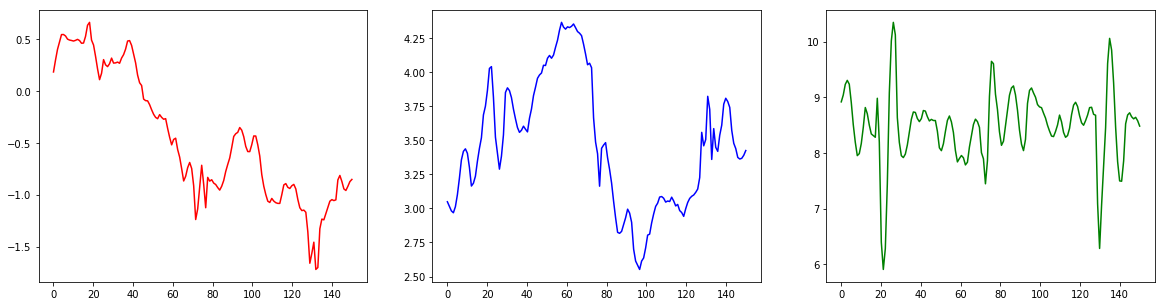

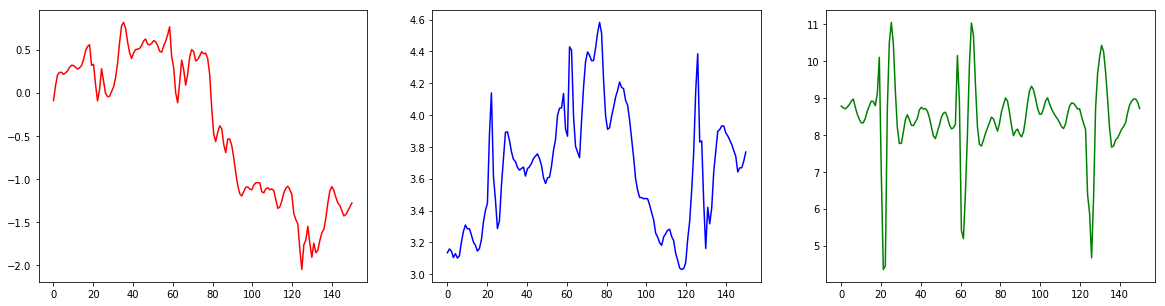

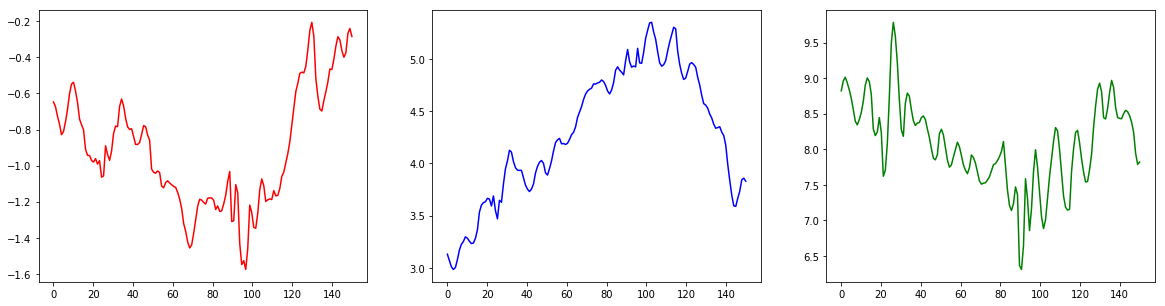

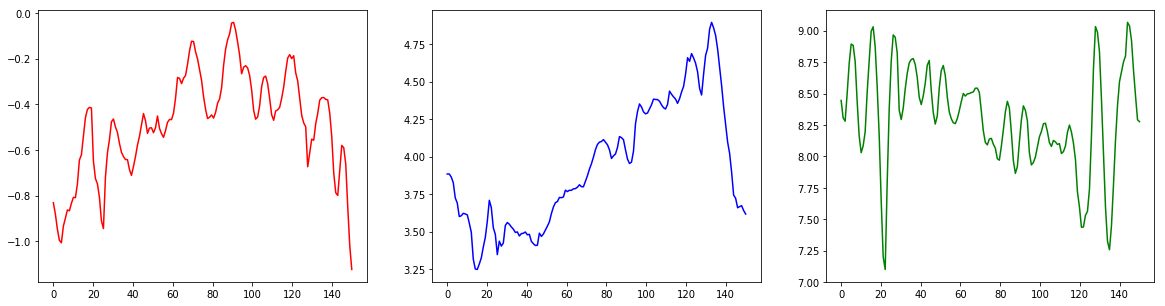

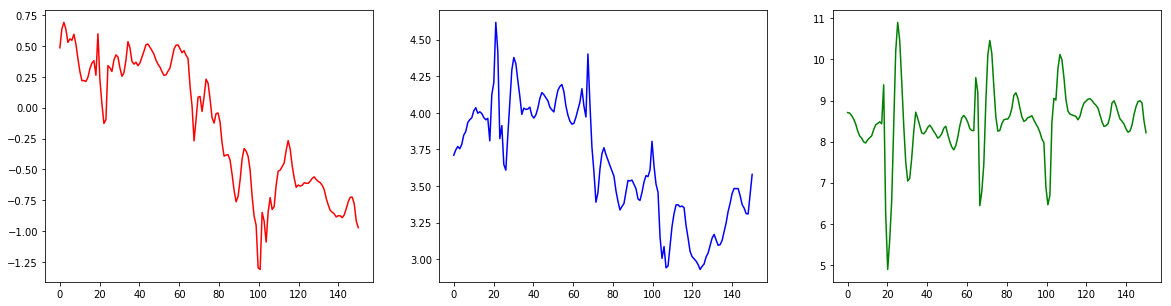

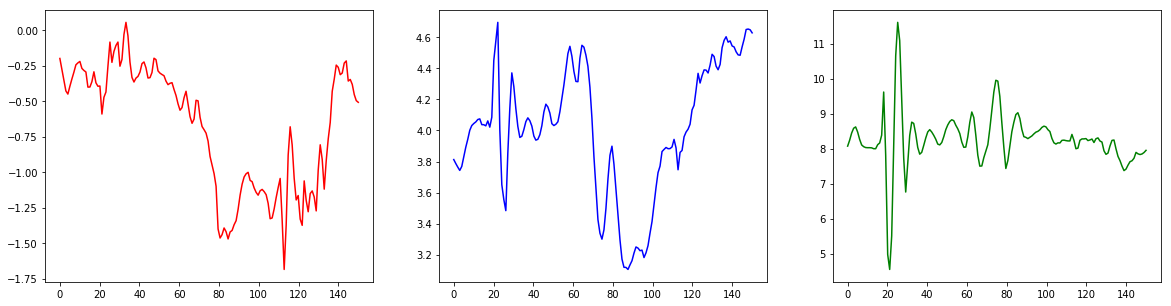

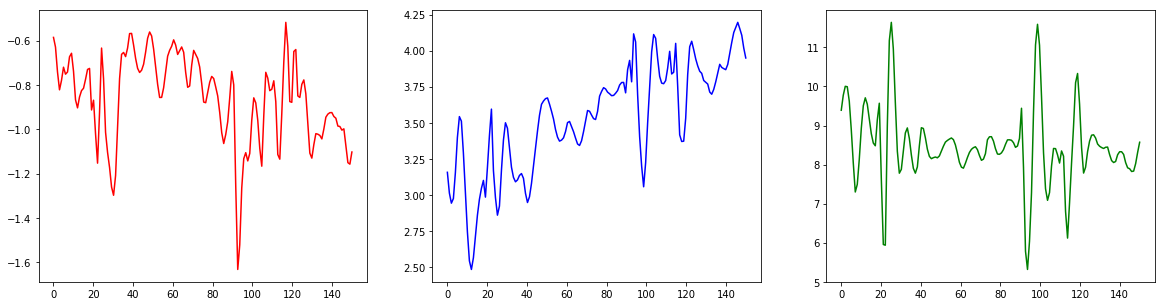

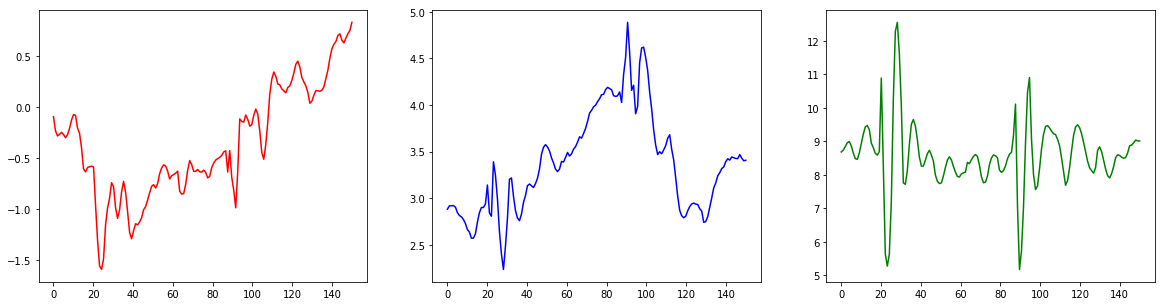

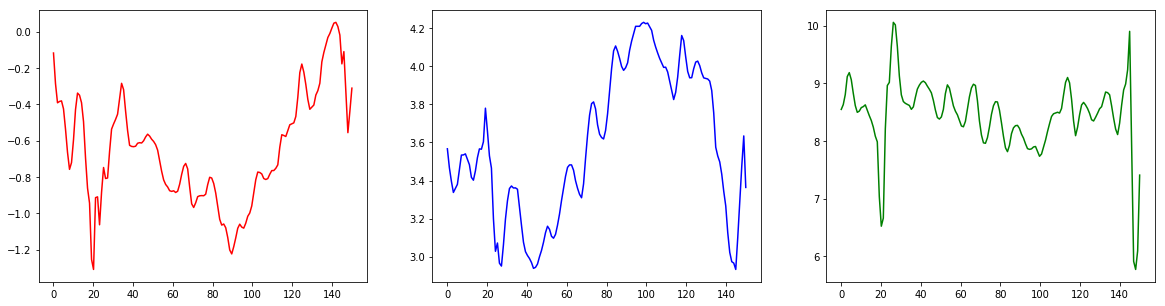

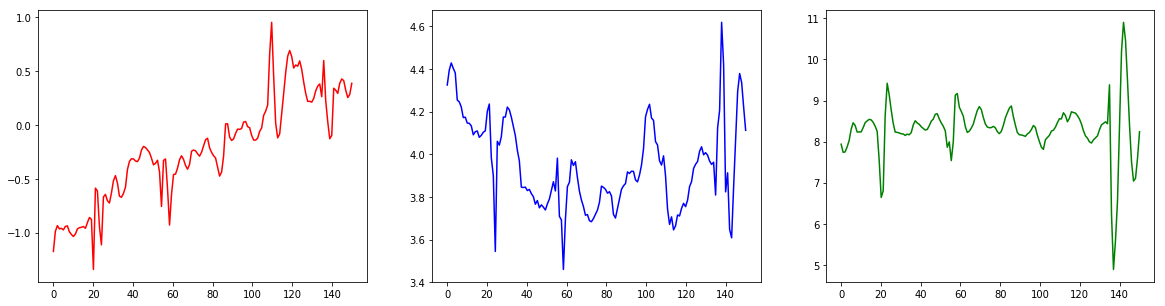

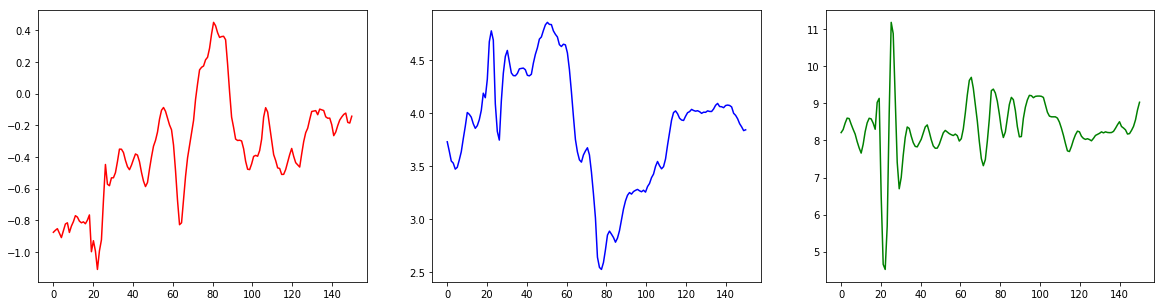

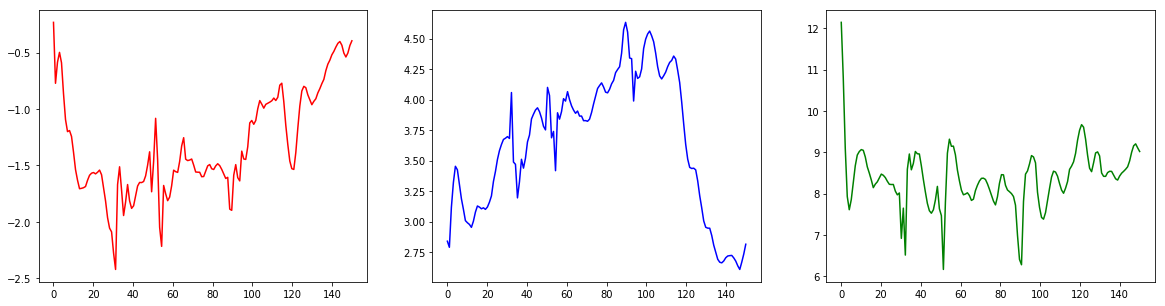

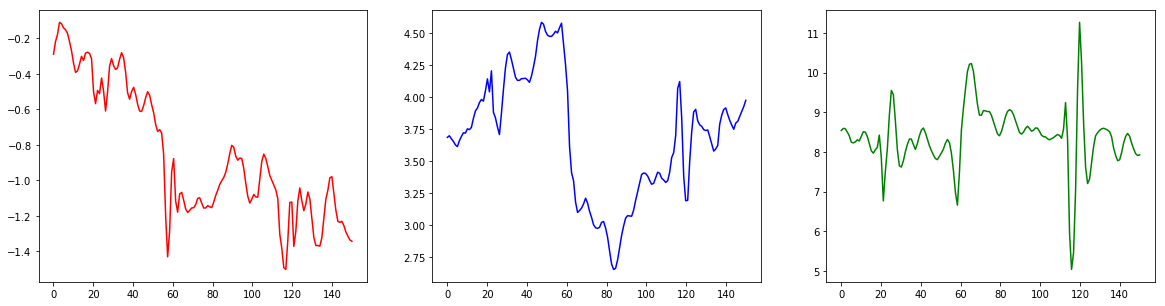

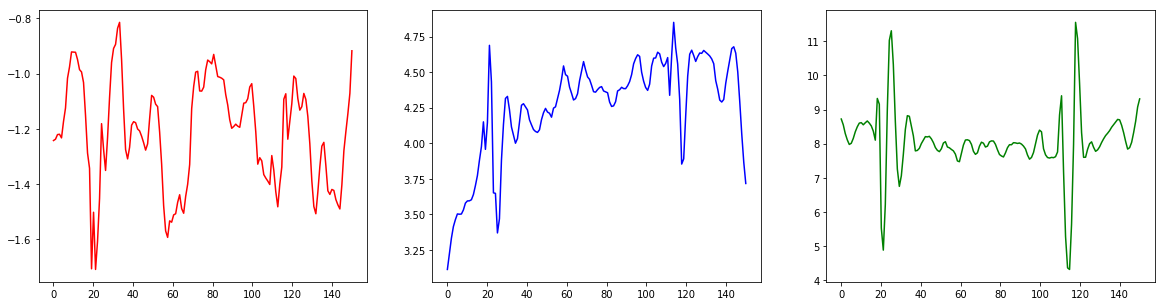

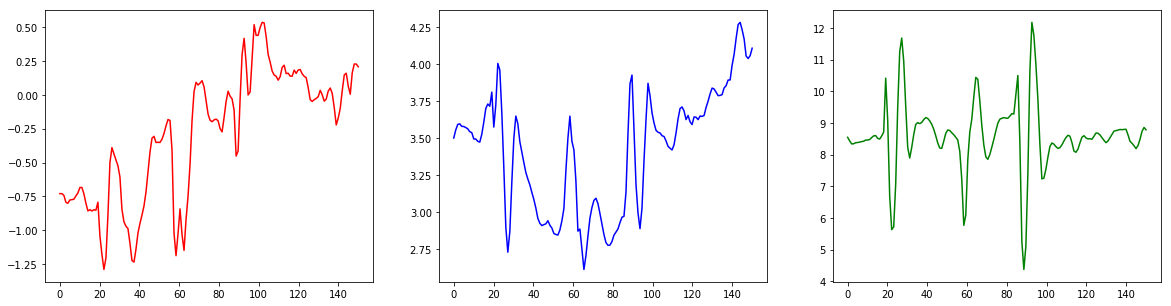

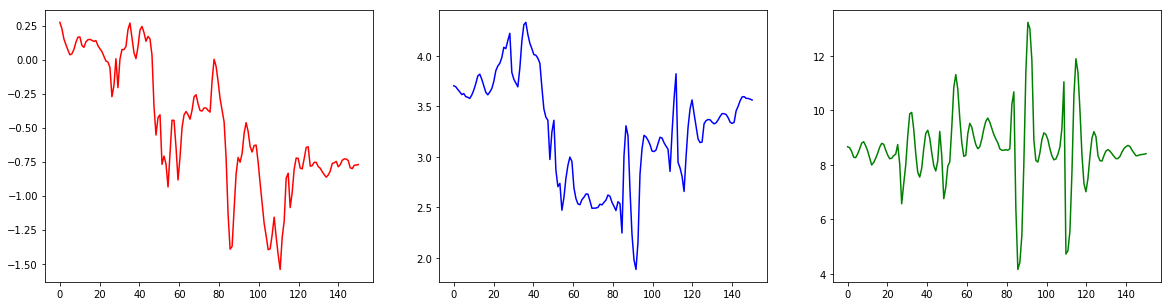

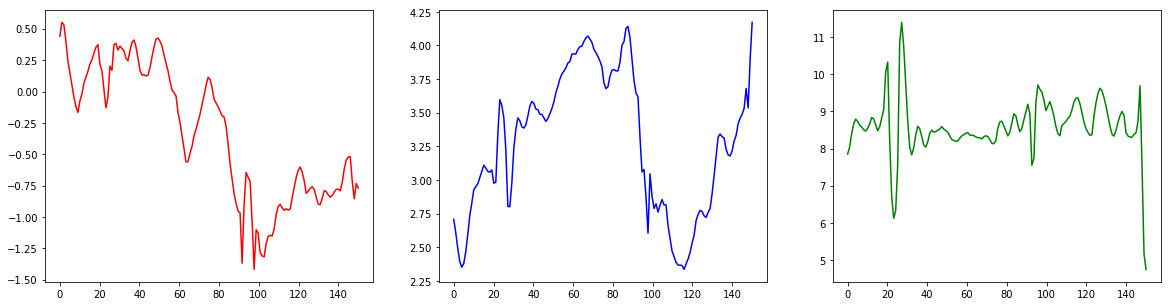

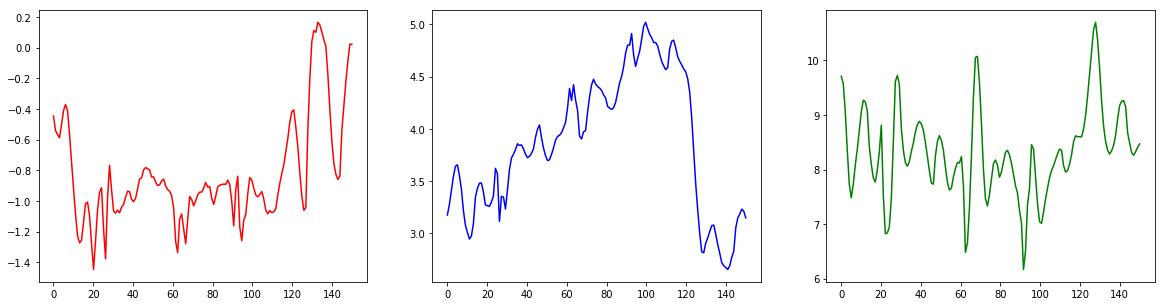

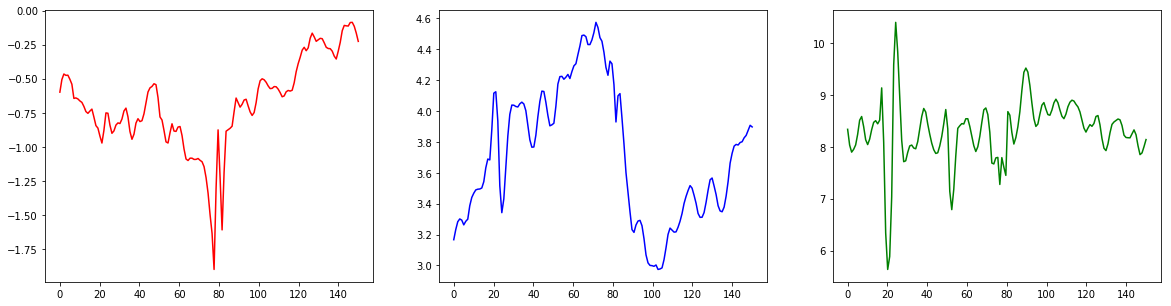

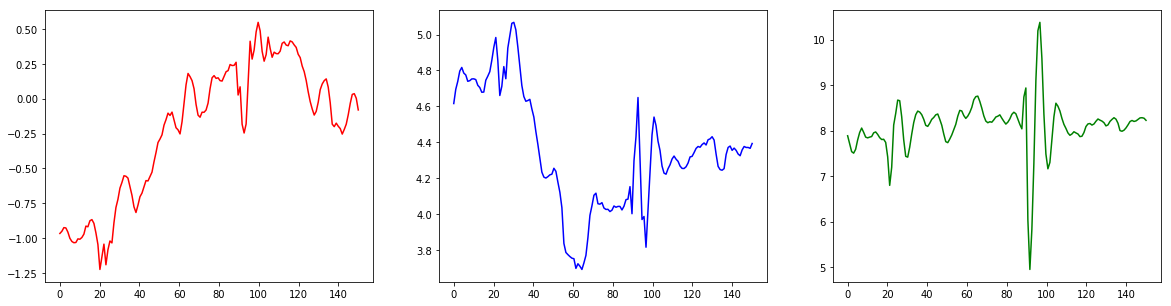

In [64]:
# pentru plotarea unor sample-uri



print("iterating over sample:")
user = 1
for sample in range(0, 20):
    plt.figure(figsize=(20, 5))
    
    k = 0
    plt.subplot(1, 3, k + 1)
    data = dataOfUser[user][sample][:, k]
    x = np.linspace(0, 150, data.size)
    plt.plot(x, data, 'r')
    
    k = 1
    plt.subplot(1, 3, k + 1)
    data = dataOfUser[user][sample][:, k]
    x = np.linspace(0, 150, data.size)
    plt.plot(x, data, 'b')
    
    k = 2
    plt.subplot(1, 3, k + 1)
    data = dataOfUser[user][sample][:, k]
    x = np.linspace(0, 150, data.size)
    plt.plot(x, data, 'g')
    
    plt.show()
print(separator)


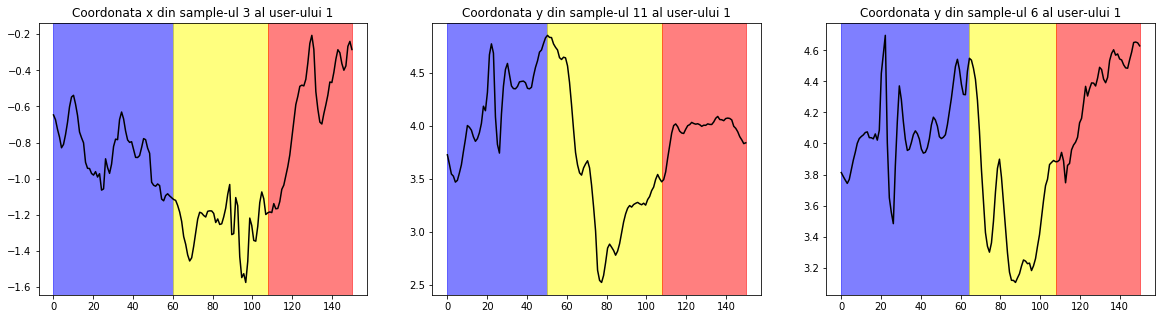

In [27]:
# pentru afisarea plot-urilor din documentatie

def indexToSymbol(index):
    if index == 0:
        return 'x'
    if index == 1:
        return 'y'
    return 'z'


plt.figure(figsize=(20, 5))
plots = [(1, 2, 0), (1, 10, 1), (1, 5, 1)]
intervals = [0] * len(plots)

intervals[0] = [60, 108]
intervals[1] = [50, 108]
intervals[2] = [64, 108]

for k in range(len(plots)):
    tup = plots[k]
    user = tup[0]
    sample = tup[1]
    coord = tup[2]
    coordSymbol = indexToSymbol(coord)
    
    title = "Coordonata %s din sample-ul %i al user-ului %i" % (coordSymbol, sample + 1, user)
    
    plt.subplot(1, len(plots), k + 1)
    data = dataOfUser[user][sample][:, coord]
    x = np.linspace(0, 150, data.size)
    plt.title(title)
          
    plt.axvspan(0, intervals[k][0], color='blue', alpha=0.5)
    plt.axvspan(intervals[k][0], intervals[k][1], color='yellow', alpha=0.5)
    plt.axvspan(intervals[k][1], 150, color='red', alpha=0.5)
          
          
    plt.plot(x, data, 'k')